# Regression

利用toy dataset 來實現regression

## Part1. 純用python

#### Step1. 產生toy dataset
利用一些數據處理的module來練習線性回歸  
在這簡單利用一維數據且沒有常數項來看

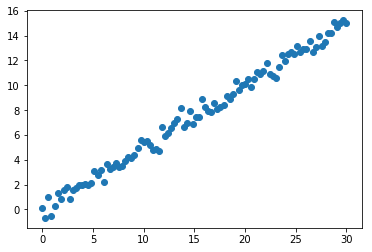

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,30,100)
y = 0.5*x+ np.random.normal(0,0.5,(100,))

plt.figure()
plt.scatter(x,y)
plt.show()

#### Step2. 定義損失函數與訓練方法

我們假定目標函數 h(x) = theta * x + b 
定義損失函數即loss function J(theta)為 Σ((h(x) - y)^2)/2n 其中n為全部的訓練組數  
其中乘上的2為後面做梯度運算方便消去  
此為Mean squared error損失函數，是一種常用的損失函數  

-3.5638352835769327


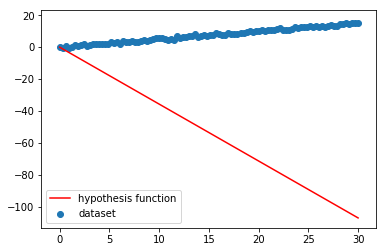

In [6]:
theta = np.random.normal(-1,2) # random create theta

def h_x(theta):
    return theta*x
print(theta)
plt.figure()
plt.plot(x,h_x(theta),label='hypothesis function', color='red')
plt.scatter(x,y,label= 'dataset')
plt.legend()
plt.show()

定義損失函數
把損失函數的圖形化出來看看

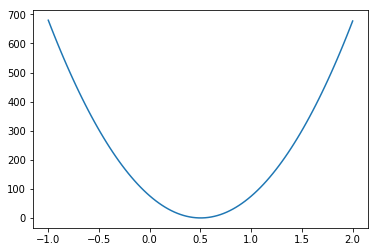

In [7]:
def J_theta(theta):
    return np.sum((h_x(theta)-y)**2)/100

theta_show = np.linspace(-1,2,100)
theta_show_y = np.zeros(shape=(100,))

i=0
for t in theta_show:
    theta_show_y[i] = J_theta(t)
    i+=1
    
plt.figure()
plt.plot(theta_show, theta_show_y)
plt.show()

在訓練的時候是利用gradiant descent梯度下降法  
對x做偏微分來做數據更新  
theta = theta - arpha*Σ((h(x) - y)*x)/n 

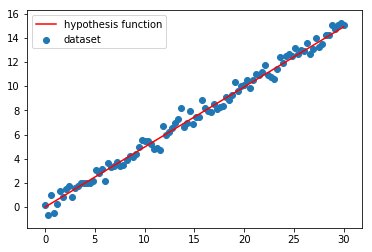

In [29]:
def update_theta(arpha,theta):
    theta -= arpha*(np.sum((h_x(theta)-y)*x)/100)
    return theta

arpha = 0.0001

for i in range(10):
    theta= update_theta(arpha,theta)
    
plt.figure()
plt.plot(x,h_x(theta),label='hypothesis function', color='red')
plt.scatter(x,y,label= 'dataset')
plt.legend()
plt.show()

最後可以得出一條與數據集吻合的線  
記得讓學習率設定妥當  
太大會無法收斂  
太小會收斂過慢

另外嘗試用動畫圖來觀察學習過程

<IPython.core.display.Javascript object>


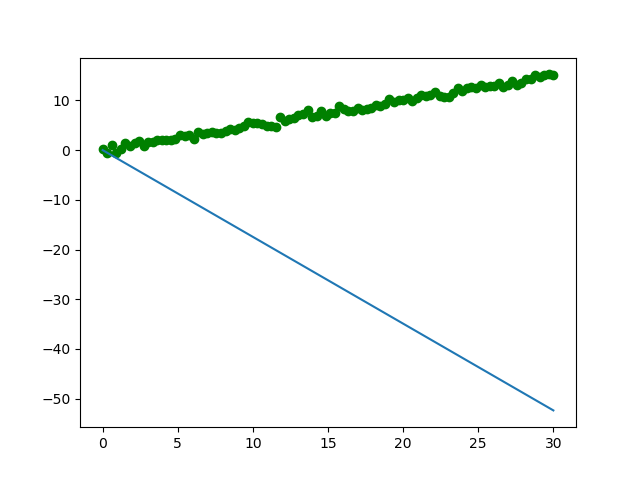

In [30]:
from matplotlib import animation as animation
%matplotlib notebook

fig, ax = plt.subplots()
theta = np.random.normal(-1,2) # init theta
o = ax.scatter(x,y,color='green')
ya, = ax.plot(x,h_x(theta))

def get_newtheta():
    for i in range(100):
        theta = update_theta(arpha,theta)
        yield  theta

def update_func(theta):
    ya.set_ydata(h_x(theta))
    return ya,

def ini():
    ya.set_ydata(h_x(theta))
    return ya,

ani = animation.FuncAnimation(fig,func=update_func, frames=get_newtheta, init_func=ini, interval=1)

plt.show()